# 4.10: Coding Etiquette & Excel Reporting
# Questions 1-5

Content List:
1. Import Libraries, Create Path and Import Datasets
2. Address any PII data in the data 
3. Create a regional segmentation of the data
4. Determine whether there’s a difference in spending habits between the different U.S. regions
5. Create an exclusion flag for low-activity customers
6. Create customer profiles based on Age, Income, Department Purchases and Incomes
7. Export Updated Dataset

1. Import Libraries, Create Path and Import Datasets

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os

In [2]:
#Create Path
path = r'C:\Users\ryanc\OneDrive\Documents\Data Analytics Exercises\Python\Instacart Basket Analysis'

In [3]:
#Import merged df
merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_for_410.pkl'))

In [4]:
#Change settings to view all columns of data
pd.set_option('display.max_columns', None)

In [5]:
#View Head of Data
merged.head()

,department_id,prices,order_id,user_id,order_number,spender_flag,State,Age,n_dependants,income,fam_status
0,19,5.8,3139998,138,28,Low Spender,Minnesota,81,1,49620,married
1,19,5.8,1977647,138,30,Low Spender,Minnesota,81,1,49620,married
2,12,20.0,3160996,138,1,Low Spender,Minnesota,81,1,49620,married
3,12,20.0,2254091,138,10,Low Spender,Minnesota,81,1,49620,married
4,10,12.9,505689,138,9,Low Spender,Minnesota,81,1,49620,married


2. Address any PII data in the data 

For this data, the PII that would need to be addressed are the Customer's First and Last Name. Only first names would be fine but when combined with last names this can become a problem. 

#Note: 
Dropped First Name and Last Name columns already dropped due to not needing for this assignment 
due to multiple memory issues

3. Create a regional segmentation of the data

In [7]:
#View the State Column further
merged['State'].value_counts().sort_index()

State
Alabama                 638003
Alaska                  648495
Arizona                 653964
Arkansas                636144
California              659783
Colorado                639280
Connecticut             623022
Delaware                637024
District of Columbia    613695
Florida                 629027
Georgia                 656389
Hawaii                  632901
Idaho                   607119
Illinois                633024
Indiana                 627282
Iowa                    625493
Kansas                  637538
Kentucky                632490
Louisiana               637482
Maine                   638583
Maryland                626579
Massachusetts           646358
Michigan                630928
Minnesota               647825
Mississippi             632675
Missouri                640732
Montana                 635265
Nebraska                625813
Nevada                  636139
New Hampshire           615378
New Jersey              627692
New Mexico              654494
Ne

In [8]:
#Create a regional segmentation flag
region = []

for value in merged['State']:
  if value in ['Maine',
             'New Hampshire', 
             'Vermont', 
             'Massachusetts', 
             'Rhode Island', 
             'Connecticut', 
             'New York', 'Pennsylvania', 'New Jersey']:
    region.append("North East")
  elif value in ['Wisconsin', 
           'Michigan', 
           'Illinois', 
           'Indiana', 
           'Ohio', 
           'North Dakota', 'South Dakota', 
           'Nebraska', 'Kansas', 
           'Minnesota', 'Iowa', 'Missouri']:
    region.append("Midwest")
  elif value in ['Delaware', 
         'Maryland', 
         'District of Columbia', 
         'Virginia', 'West Virginia',
         'North Carolina', 'South Carolina', 
         'Georgia', 'Florida', 
         'Kentucky', 'Tennessee', 
         'Mississippi', 'Alabama', 
         'Oklahoma', 'Texas', 
         'Arkansas', 'Louisiana']:
    region.append("South")
  elif value in ['Idaho', 'Montana', 
        'Wyoming', 'Nevada', 
        'Utah', 'Colorado', 
        'Arizona', 'New Mexico', 
        'Alaska', 'Washington', 
        'Oregon', 'California', 'Hawaii']:
    region.append("West")
  else:
    region.append("NaN")

In [9]:
#Create a column for the new 'region' label
merged['region'] = region

In [10]:
#Check value counts of 'region' label
merged['region'].value_counts()

region
South         10791885
West           8292913
Midwest        7597325
North East     5722736
Name: count, dtype: int64

4. Determine whether there’s a difference in spending habits between the different U.S. regions

In [11]:
#Create a crosstab of 'region' and 'spender_flag' columns
crosstab = pd.crosstab(merged['region'], merged['spender_flag'], dropna = False)

In [12]:
#View Crosstab of these 2 columns
crosstab

spender_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
North East,108225,5614511
South,209691,10582194
West,160354,8132559


In [13]:
#import visual libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Text(0, 0.5, 'Frequency')

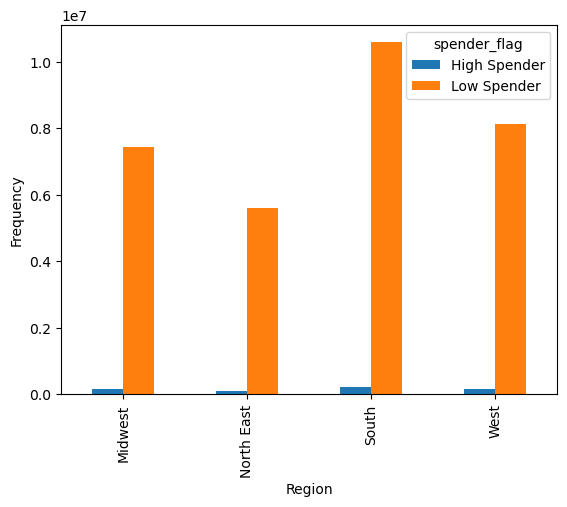

In [15]:
#Create Bar Chart
regional_spending_bar = crosstab.plot.bar()
plt.xlabel("Region", fontsize=10)
plt.ylabel("Frequency",fontsize=10)

In [36]:
#Export bar graph
regional_spending_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regional_spending_bar.png'))

5. Create an exclusion flag for low-activity customers

In [15]:
#Create a flag for low activity 
merged.loc[merged['order_number'] < 5, 'customer_activity_flag'] = 'low activity'

In [16]:
#Create a flag for high activity 
merged.loc[merged ['order_number'] >= 5, 'customer_activity_flag'] = 'high activity'

In [17]:
#Check the new flag worked
merged['customer_activity_flag'].value_counts()

customer_activity_flag
high activity    24414877
low activity      7989982
Name: count, dtype: int64

In [19]:
#Isolate high activity customers only
merged_high_activity = merged[merged['customer_activity_flag']=='high activity']

In [20]:
merged_high_activity.head()

,department_id,prices,order_id,user_id,order_number,spender_flag,State,Age,n_dependants,income,fam_status,region,customer_activity_flag
0,19,5.8,3139998,138,28,Low Spender,Minnesota,81,1,49620,married,Midwest,high activity
1,19,5.8,1977647,138,30,Low Spender,Minnesota,81,1,49620,married,Midwest,high activity
3,12,20.0,2254091,138,10,Low Spender,Minnesota,81,1,49620,married,Midwest,high activity
4,10,12.9,505689,138,9,Low Spender,Minnesota,81,1,49620,married,Midwest,high activity
5,4,1.7,960220,138,17,Low Spender,Minnesota,81,1,49620,married,Midwest,high activity


In [21]:
#Export new dataset with only high_activity customers
merged_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'merged_high_activity.pkl'))

6. Create customer profiles based on Age, Income, Department Purchases and Incomes

6a. Create profiles based on Age

In [23]:
#Create an 18-29 Group
age_group_18_29 = merged.loc[merged['Age'] <= 29, 'age_group'] = '18-29'

In [24]:
#Create an 30-39 Group
age_group_30_39 = merged.loc[(merged['Age'] > 29) & (merged['Age'] <= 39), 'age_group'] = '30-39'

In [25]:
#Create an 40-49 Group
age_group_40_49 = merged.loc[(merged['Age'] > 39) & (merged['Age'] <= 49), 'age_group'] = '40-49'

In [26]:
#Create an 50-64 Group
age_group_50_64 = merged.loc[(merged['Age'] > 49) & (merged['Age'] <= 64), 'age_group'] = '50-64'

In [27]:
#Create an 65+ Group
age_group_65_up = merged.loc[merged['Age'] >= 65, 'age_group'] = '65_up'

In [28]:
#Check value counts of new age grouping
merged['age_group'].value_counts(dropna = False)

age_group
65_up    8575084
50-64    7556346
18-29    6090441
40-49    5109237
30-39    5073751
Name: count, dtype: int64

6b. Create Profiles based on income

In [29]:
#Analyze the income column
merged['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [30]:
#Create a low income group
low_income = merged.loc[merged['income'] <= 67004.0, 'income_group'] = 'Low Income'

In [31]:
#Create a middle income group
middle_income = merged.loc[(merged['income'] > 67004.0) & (merged['income'] <= 96618.0), 'income_group'] = 'Middle Income'

In [ ]:
#Create a high income group
high_income = merged.loc[(merged['income'] > 96618.0) & (merged['income'] <= 127912.0), 'income_group'] = 'High Income'

In [34]:
#Create a very high income group
very_high_income = merged.loc[merged['income'] >127912.0, 'income_group'] = 'Very High Income'

In [35]:
merged['income_group'].value_counts(dropna = False)

income_group
Low Income          8101644
High Income         8101201
Very High Income    8101038
Middle Income       8100976
Name: count, dtype: int64

6c. Create profiles based on departments 

In [36]:
#Import 'departments_wrangled' dataset
departments = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'department_wrangled.csv'), index_col= False)

In [37]:
#View departments df
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [38]:
#Rename 'Unnamed:0' column
departments.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [39]:
#Check rename was successful
departments.head(21)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [41]:
#Create labels for departments
dept_label = []

for value in merged["department_id"]:
  if value in [1, 4, 7, 9, 10, 12, 13, 15, 16, 19, 20]:
    dept_label.append("Groceries")
  elif value in [3, 5, 6, 8, 11, 14, 17, 18,]:
    dept_label.append("Non_Groceries")
  else:
    dept_label.append("Other")

In [42]:
#Create a new column for dept_label
merged['dept_label'] = dept_label

6d. Create profiles based on number of dependants

In [43]:
#Create a label for customer with no dependants
no_dependants = merged.loc[merged['n_dependants'] == 0, 'n_dependants_group'] = 'Single Adult'

In [44]:
#Create a label for customer with 1 dependant
Young_Parents = merged.loc[merged['n_dependants'] == 1, 'n_dependants_group'] = 'Young Parent'

In [45]:
#Create a label for customer with 2+ dependants
Large_Family = merged.loc[merged['n_dependants'] >= 2, 'n_dependants_group'] = 'Large Family'

In [46]:
#Check value counts of dependant label
merged['n_dependants_group'].value_counts(dropna = False)

n_dependants_group
Large Family    16226252
Single Adult     8097503
Young Parent     8081104
Name: count, dtype: int64

7. Export Updated Dataset

In [47]:
#Export merged_updated data with new data types
merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'merged_410_new.pkl'))